<a href="https://colab.research.google.com/github/AbirHentati/Prodigy-InfoTech/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab')

MessageError: Error: credential propagation was unsuccessful

# **Load data**

In [ ]:
#import the dataset
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Preprocessing**

In [ ]:
#chacking is there any nun value are or not
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encoding
le = LabelEncoder()
le

LabelEncoder()

In [ ]:
from pandas.api.types import is_numeric_dtype

for i in df.columns:
    if not is_numeric_dtype(df[i]):
        df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **visualisation**

<Axes: xlabel='species', ylabel='count'>

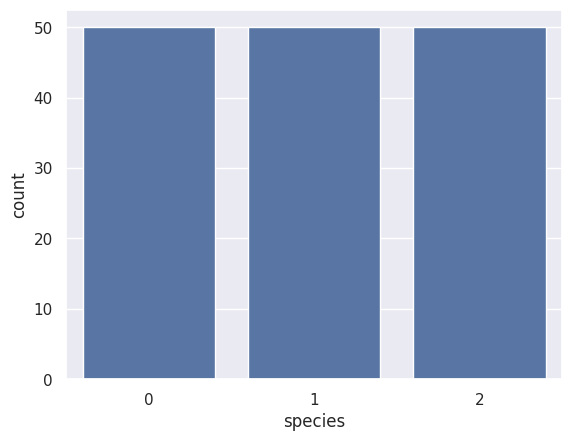

In [ ]:
import seaborn as sns

sns.set()

sns.countplot(x = df.species)

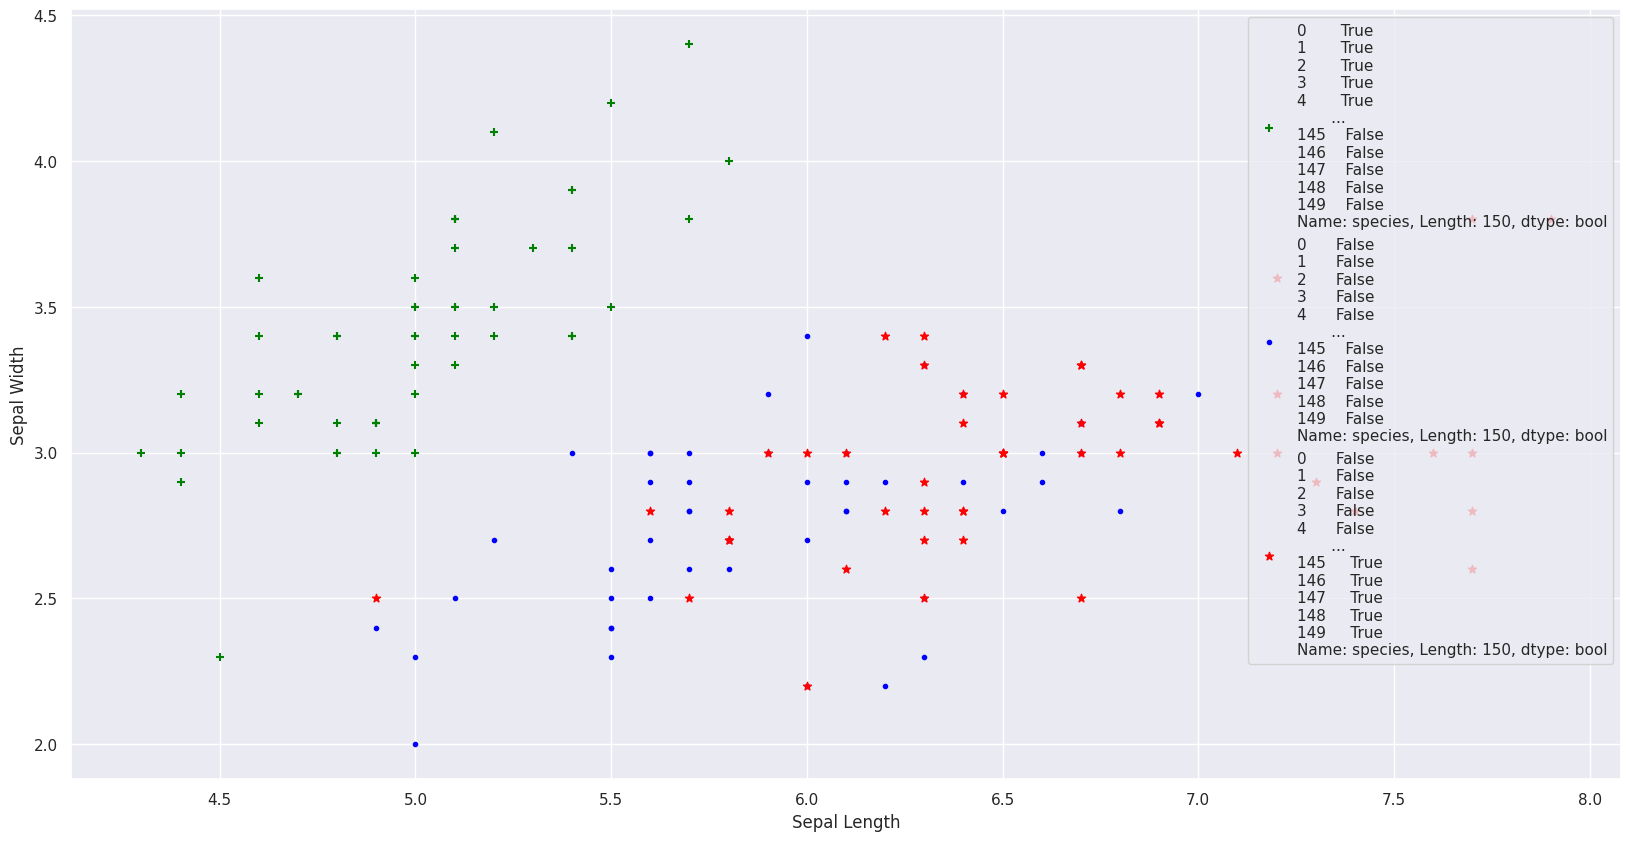

In [ ]:
df0 = df[df.species == 0]
df1 = df[df.species == 1]
df2 = df[df.species == 2]

plt.figure(figsize=(20,10))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal_length'], df0['sepal_width'],color="green",marker='+' , label = df.species == 0)
plt.scatter(df1['sepal_length'], df1['sepal_width'],color="blue",marker='.',  label = df.species == 1)
plt.scatter(df2['sepal_length'], df2['sepal_width'],color="red",marker='*',  label = df.species == 2)
plt.legend()
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

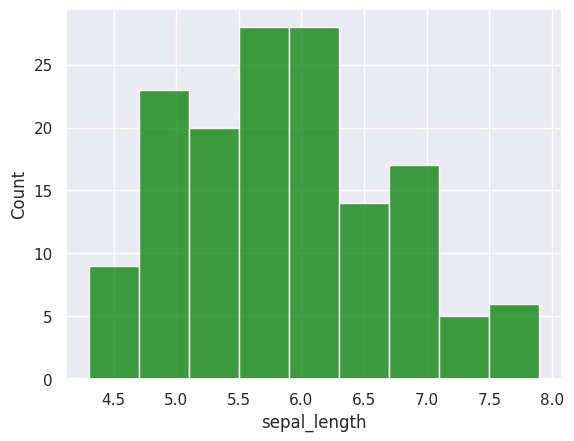

In [ ]:
sns.histplot(data = df , x = df.sepal_length ,color = 'green')

<Axes: xlabel='sepal_width', ylabel='Count'>

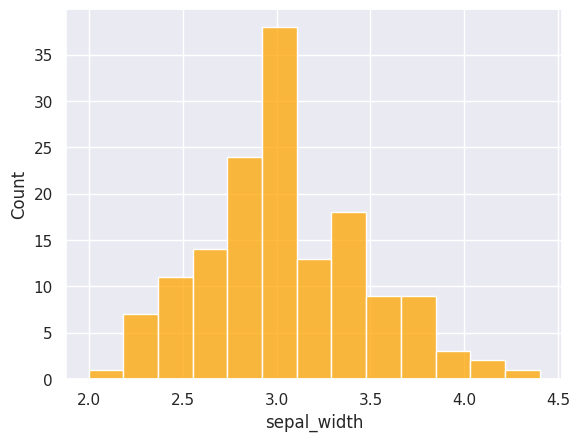

In [ ]:
sns.histplot(data = df , x = df.sepal_width ,color = 'orange')

<Axes: xlabel='petal_width', ylabel='Count'>

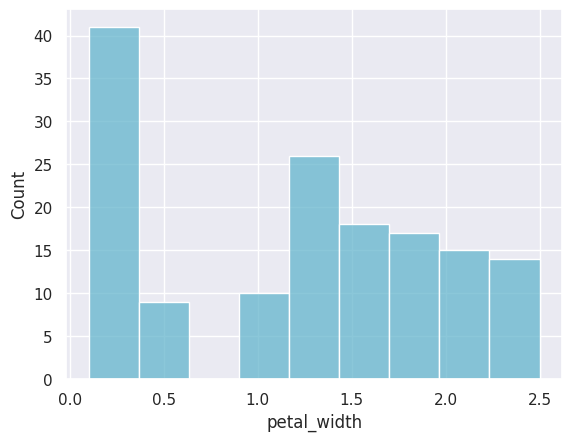

In [ ]:
sns.histplot(data = df , x = df.petal_width ,color = 'c')

# **Data Preparation**

## Data separation as X and y

In [ ]:
X = df.drop(['species'], axis='columns')
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df.species
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

**Data splitting**

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , y , test_size =0.2, random_state=100)

In [ ]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
119,6.0,2.2,5.0,1.5
12,4.8,3.0,1.4,0.1
16,5.4,3.9,1.3,0.4
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [ ]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
118,7.7,2.6,6.9,2.3
15,5.7,4.4,1.5,0.4
123,6.3,2.7,4.9,1.8
135,7.7,3.0,6.1,2.3
32,5.2,4.1,1.5,0.1
1,4.9,3.0,1.4,0.2
116,6.5,3.0,5.5,1.8
45,4.8,3.0,1.4,0.3


# **Model Building**


## **Linear Regression**

###**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Instancier l'encodeur
label_encoder = LabelEncoder()

# Encoder les étiquettes de classe en valeurs numériques

# we can do it in place of 'le'
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Créer et ajuster le modèle de régression linéaire
lr = LinearRegression()
lr.fit(x_train, y_train_encoded)


LinearRegression()

###**Applying the model to make a prediction**

In [ ]:
# Predictions about training data
y_lr_train_pred = lr.predict(x_train)

# Predictions about testing data
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([ 9.34420438e-01,  1.15668126e+00,  1.48647990e+00, -8.35187957e-02,
       -4.18459712e-02,  1.27475417e+00, -5.72695640e-02,  1.17111089e+00,
        2.04533953e+00,  2.01565930e+00,  8.17920506e-02,  1.19673661e+00,
        1.88947412e+00,  2.12171305e+00, -7.63372421e-02,  2.66981600e-02,
        1.70687914e-03,  4.32077524e-02,  1.07900760e+00, -7.63372421e-02,
        1.71655780e-01, -1.01008953e-01,  1.31307345e+00,  1.82082351e+00,
        1.58016071e+00,  1.37877014e+00,  1.72004330e+00,  1.17301891e+00,
        2.02364620e+00,  1.69302659e+00,  1.05021487e+00, -1.34425151e-01,
        1.78873282e+00,  1.86228547e+00,  1.44421155e+00, -1.63934464e-01,
       -2.35072403e-02,  1.72984945e+00,  4.84147717e-02, -1.42906839e-01,
        2.04199073e-01,  1.32546202e+00,  1.98025294e+00,  2.09591538e+00,
        1.52939727e+00, -1.01075469e-01,  1.35733091e+00,  1.56345261e+00,
        9.53850008e-03,  1.27232808e+00,  8.99096222e-01,  1.56089452e+00,
       -8.37173022e-02,  

In [ ]:
y_lr_test_pred

array([ 1.89832627, -0.00489112,  2.20191459, -0.05532159,  1.58053116,
        1.99648292, -0.16608095, -0.0342674 ,  1.67892747,  0.03329616,
       -0.03871892,  1.92253549,  0.09361166, -0.08664585,  1.88495713,
        1.14980365,  0.96879065,  1.48938189,  1.96910669,  1.82668164,
        1.71520569,  0.03442212,  1.67395892,  0.01672005,  1.02257466,
        1.64360325,  1.18792442, -0.03726246,  1.19704055,  1.96701579])

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score

# Calculate evaluation metrics for training set
lr_train_mse = mean_squared_error(y_train_encoded, y_lr_train_pred)
lr_train_r2 = r2_score(y_train_encoded, y_lr_train_pred)

# Calculate evaluation metrics for the test set
lr_test_mse = mean_squared_error(y_test_encoded, y_lr_test_pred)
lr_test_r2 = r2_score(y_test_encoded, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ',lr_train_mse)
print('LR R2 (Train): ',lr_train_r2)
print('LR MSE (Test): ',lr_test_mse)
print('LR R2 (Test): ',lr_test_r2)

LR MSE (Train):  0.04916693786348207
LR R2 (Train):  0.9223339287808093
LR MSE (Test):  0.036234680547680705
LR R2 (Test):  0.9544536138367142


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE','Tarining R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Tarining R2,Test MSE,Test R2
0,Linear regression,0.049167,0.922334,0.036235,0.954454


## **Random Forest**

###**Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train_encoded)

RandomForestRegressor(max_depth=2, random_state=100)

###**Applying the model to make a prediction**

In [ ]:
# Predictions about training data
y_rf_train_pred = rf.predict(x_train)

# Predictions about testing data
y_rf_test_pred = rf.predict(x_test)

###**Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error ,r2_score

# Calculate evaluation metrics for training set
rf_train_mse = mean_squared_error(y_train_encoded, y_rf_train_pred)
rf_train_r2 = r2_score(y_train_encoded, y_rf_train_pred)

# Calculate evaluation metrics for the test set
rf_test_mse = mean_squared_error(y_test_encoded, y_rf_test_pred)
rf_test_r2 = r2_score(y_test_encoded, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE','Tarining R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Tarining R2,Test MSE,Test R2
0,Random Forest,0.02223,0.964885,0.032338,0.959352


##**Model Comparison**

In [ ]:
df_models = pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Tarining R2,Test MSE,Test R2
0,Linear regression,0.049167,0.922334,0.036235,0.954454
1,Random Forest,0.02223,0.964885,0.032338,0.959352


# **Classification**

## **ExtraTreesClassifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier

etc = ExtraTreesClassifier(n_estimators = 200 , random_state=100)
etc.fit(x_train , y_train)
print(f'train score:{etc.score(x_train , y_train)}')
print(f'test score:{etc.score(x_test , y_test)}')

train score:1.0
test score:0.9666666666666667


## **RandomForestClassifier**

In [ ]:
ran = RandomForestClassifier(n_estimators = 300 , random_state=100)
ran.fit(x_train , y_train)
print(f'train score of RandomForestClassifier : {ran.score(x_train , y_train)}')
print(f'test score of RandomForestClassifier : {ran.score(x_test , y_test)}')

train score of RandomForestClassifier : 1.0
test score of RandomForestClassifier : 0.9666666666666667


In [ ]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train , y_train)
print(f'train score SVM : {sv.score(x_train , y_train)}')
print(f'test score SVM : {sv.score(x_test , y_test)}')

train score SVM : 0.9416666666666667
test score SVM : 1.0


# **Data Visualisation of prediction results**

Text(0, 0.5, 'Experimental Species')

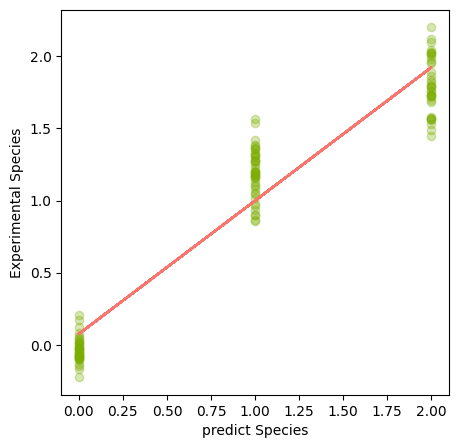

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train_encoded , y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train_encoded , y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train_encoded, p(y_train_encoded), '#F8766D')
plt.xlabel('predict Species')
plt.ylabel('Experimental Species')